In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

In [2]:
# Get current work directory
print(os.getcwd())

/home/namanh/AI/HomeWork1


In [6]:
# Read iris csv dataset
data = pd.read_csv("/home/namanh/DHBK_AI_ML_DL/Course/Day3/Coursew1/Data/iris.csv").drop(["Id"], axis = 1)
# Show 10 sample in iris_dataset
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


3
Iris-setosa: 50 datas
Iris-versicolor: 50 datas
Iris-virginica: 50 datas


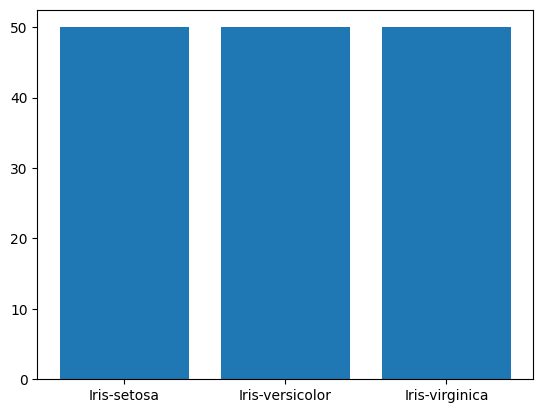

In [7]:
# Show the number of data for each target

# Print number of target
print(iris_data["Species"].nunique())

# Print the number of data for each target
for idx, target in enumerate(iris_data["Species"].value_counts().keys()):
    print("{}: {} datas".format(target, iris_data["Species"].value_counts().iloc[idx]))

plt.bar(iris_data["Species"].value_counts().keys(), iris_data["Species"].value_counts().to_list())
plt.show()

In [8]:
data['SepalLengthCm']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [9]:
# Check null value in iris_dataset
iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# Scatter plot 
def drawScatter(col1, col2):
    col = iris_data["Species"].map({"Iris-virginica": "g", "Iris-versicolor": "b", "Iris-setosa": "r"})
    iris_data.plot(kind = "scatter", x = col1, y = col2, c = col)
    plt.show()

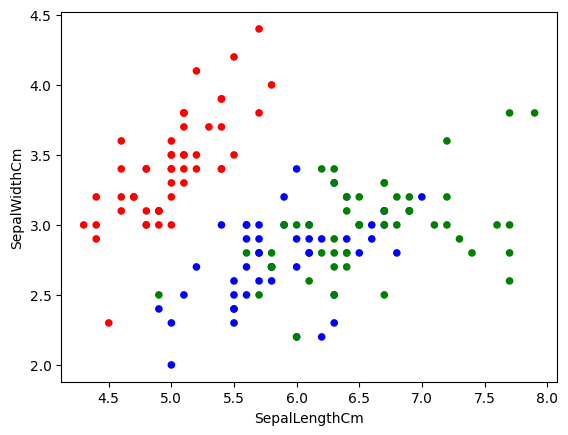

In [11]:
drawScatter("SepalLengthCm", "SepalWidthCm")

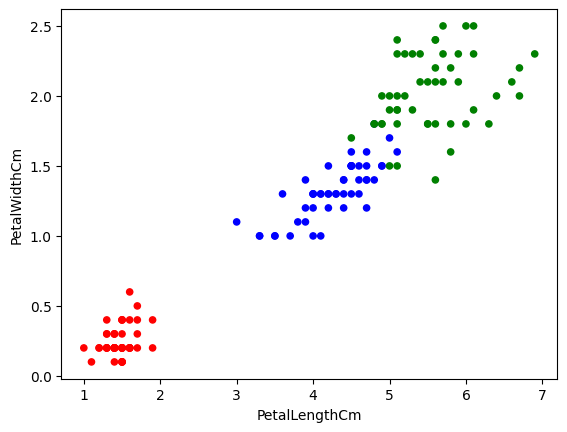

In [12]:
drawScatter("PetalLengthCm", "PetalWidthCm")

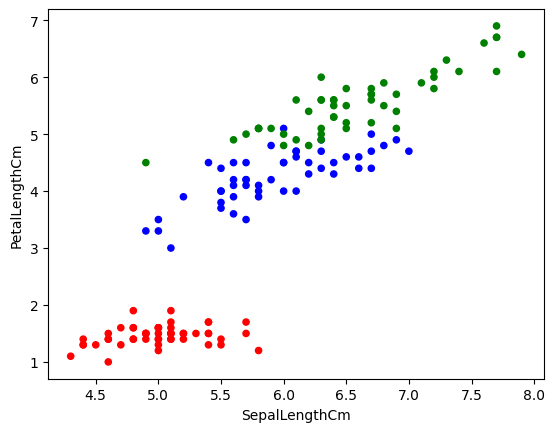

In [13]:
drawScatter("SepalLengthCm", "PetalLengthCm")

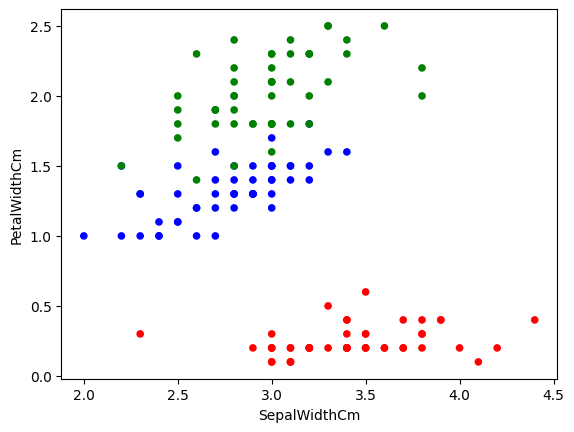

In [14]:
drawScatter("SepalWidthCm", "PetalWidthCm")

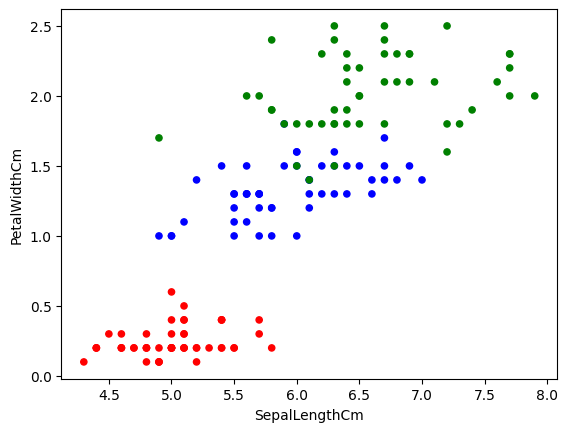

In [15]:
drawScatter("SepalLengthCm", "PetalWidthCm")

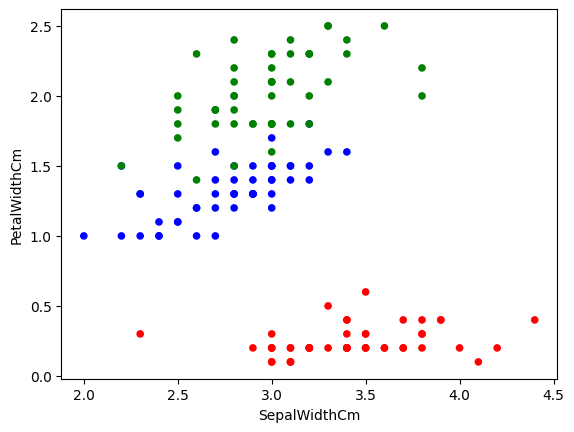

In [16]:
drawScatter("SepalWidthCm", "PetalWidthCm")

In [17]:
class SoftmaxRegression():
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.C = len(set(y))
     
        
    def softmax(self, S):
        """
        S = X^T.W (N x C) is numpy array
        X (d x N)
        W = [w1, w2, ..., wC] (d x C)
        y = (C x N)
        """
        return np.exp(S)/(np.exp(S).sum(axis = 1, keepdims = True))
    
    def one_hot_coding(self, y, C):
        # Create array for one hot coding
        y_onehot = np.zeros((C, len(y)))

        for idx, target in enumerate(y):
            y_onehot[:, idx][target] = 1

        return y_onehot
    
    def loss(self, S, y):
        y_onehot = self.one_hot_coding(y, self.C)
        A = np.log(self.softmax(S).T)
        return -(1/len(y))*((A*y_onehot).sum(axis = 1).sum(axis = 0))

    def grad(self, X, y, W):
        A = self.softmax(X.T.dot(W)).T
        E = A - self.one_hot_coding(y, self.C)
        return (1/(X.shape[1]))*(X.dot(E.T))
    
    def fit(self, lr = 0.05, batch_size = 1, num_epochs = 300, tol = 0.00001):
        W = np.random.randn(self.X.shape[0], self.C)
        W_old = W.copy()
        W_best = None
        acc_best = 0
        N = self.X.shape[1]
        
        loss_hist = [self.loss(self.X.T.dot(W), self.y)]
        epoch = 0
        nbatches = int(np.ceil(float(N)/batch_size))
        print(nbatches)
        while epoch < num_epochs:
            epoch += 1
            indexs = np.random.permutation(N)
            for batch_index in range(nbatches):
                batch_ids = indexs[batch_size*batch_index:min(batch_size*(batch_index+1), N)]
                X_batch, y_batch = self.X[:, batch_ids], self.y[batch_ids]
                W -= lr*self.grad(X_batch, y_batch, W) # gradient descent
                loss_hist.append(self.loss(X_batch.T.dot(W), y_batch))
            if np.linalg.norm(W - W_old) < tol:
                break
            W_old = W.copy()
            if acc_best < self.evaluate(W_old, self.X, self.y):
                W_best = W_old
                acc_best = self.evaluate(W_old, self.X, self.y)
            print("At epoch {}: lr = {}, train acc = {} %, loss = {}".format(epoch, lr, self.evaluate(W_old, self.X, self.y), self.loss(self.X.T.dot(W), self.y)))
        return W_best, acc_best, loss_hist
    
    def evaluate(self, W, X, y):
        y_pred = np.argmax(X.T.dot(W), axis = 1)
        y = np.array(y)
        diff = y_pred - y
        acc = (diff == 0).sum()/len(diff)*100
        return acc

In [18]:
data = iris_data.copy()
change = data["Species"].replace("Iris-setosa", 0)
data["Species"] = pd.Series(change)
change = data["Species"].replace("Iris-virginica", 1)
data["Species"] = pd.Series(change)
change = data["Species"].replace("Iris-versicolor", 2)
data["Species"] = pd.Series(change)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [19]:
from sklearn.preprocessing import RobustScaler
scalar = RobustScaler()
scalar.fit(data.drop(['Species'],axis=1))
scaled_features = scalar.transform(data.drop(['Species'],axis=1))


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data["Species"], test_size=0.20)

In [21]:
print(scaled_features)

[[-0.53846154  1.         -0.84285714 -0.73333333]
 [-0.69230769  0.         -0.84285714 -0.73333333]
 [-0.84615385  0.4        -0.87142857 -0.73333333]
 [-0.92307692  0.2        -0.81428571 -0.73333333]
 [-0.61538462  1.2        -0.84285714 -0.73333333]
 [-0.30769231  1.8        -0.75714286 -0.6       ]
 [-0.92307692  0.8        -0.84285714 -0.66666667]
 [-0.61538462  0.8        -0.81428571 -0.73333333]
 [-1.07692308 -0.2        -0.84285714 -0.73333333]
 [-0.69230769  0.2        -0.81428571 -0.8       ]
 [-0.30769231  1.4        -0.81428571 -0.73333333]
 [-0.76923077  0.8        -0.78571429 -0.73333333]
 [-0.76923077  0.         -0.84285714 -0.8       ]
 [-1.15384615  0.         -0.92857143 -0.8       ]
 [ 0.          2.         -0.9        -0.73333333]
 [-0.07692308  2.8        -0.81428571 -0.6       ]
 [-0.30769231  1.8        -0.87142857 -0.6       ]
 [-0.53846154  1.         -0.84285714 -0.66666667]
 [-0.07692308  1.6        -0.75714286 -0.66666667]
 [-0.53846154  1.6        -0.81

In [23]:
x_train = []
Y_train = []
x_test = []
Y_test = []
for c, species in zip(X_train, y_train):
    x_train.append([float(c[0]), float(c[1]), float(c[2]), float(c[3])])
    Y_train.append(int(species))
    
for c, species in zip(X_test, y_test):
    x_test.append([float(c[0]), float(c[1]), float(c[2]), float(c[3])])
    Y_test.append(int(species))
    
x_train = np.array(x_train)
Y_train = np.array(Y_train)
x_test = np.array(x_test)
Y_test = np.array(Y_test)
print(x_train.shape, Y_train.shape, x_test.shape, Y_test.shape)

(120, 4) (120,) (30, 4) (30,)


In [24]:
setosa = data[data["Species"] == 0].iloc[:10]
virginica = data[data["Species"] == 1].iloc[:10]
versicolor = data[data["Species"] == 2].iloc[:10]
test2 = pd.concat([setosa, virginica, versicolor])
X_test2 = []
y_test2 = []

for sepal_length, sepal_width, petal_length, petal_width, species in zip(test2["SepalLengthCm"], test2["SepalWidthCm"], test2["PetalLengthCm"], test2["PetalWidthCm"], test2["Species"]):
    X_test2.append([float(sepal_length), float(sepal_width), float(petal_length), float(petal_width)])
    y_test2.append(int(species))
X_test2 = np.array(X_test2)
y_test2 = np.array(y_test2)
print(X_test2[0], y_test2[0])
print(X_test2.shape, y_test2.shape)

setosa = data[data["Species"] == 0].iloc[10:]
virginica = data[data["Species"] == 1].iloc[10:]
versicolor = data[data["Species"] == 2].iloc[10:]
train2 = pd.concat([setosa, virginica, versicolor])
X_train2 = []
y_train2 = []

for sepal_length, sepal_width, petal_length, petal_width, species in zip(train2["SepalLengthCm"], train2["SepalWidthCm"], train2["PetalLengthCm"], train2["PetalWidthCm"], train2["Species"]):
    X_train2.append([float(sepal_length), float(sepal_width), float(petal_length), float(petal_width)])
    y_train2.append(int(species))
X_train2 = np.array(X_train2)
y_train2 = np.array(y_train2)
print(X_train2[0], y_train2[0])
print(X_train2.shape, y_train2.shape)

[5.1 3.5 1.4 0.2] 0
(30, 4) (30,)
[5.4 3.7 1.5 0.2] 0
(120, 4) (120,)


In [25]:
train = SoftmaxRegression(X_train2.T, y_train2)
w_best, acc, hist = train.fit()
print(w_best)

120
At epoch 1: lr = 0.05, train acc = 66.66666666666666 %, loss = 1.687904908652305
At epoch 2: lr = 0.05, train acc = 66.66666666666666 %, loss = 0.6805026737880232
At epoch 3: lr = 0.05, train acc = 66.66666666666666 %, loss = 0.6570486664979506
At epoch 4: lr = 0.05, train acc = 66.66666666666666 %, loss = 1.1117141733288516
At epoch 5: lr = 0.05, train acc = 83.33333333333334 %, loss = 0.33669444551815825
At epoch 6: lr = 0.05, train acc = 68.33333333333333 %, loss = 0.8192833057753038
At epoch 7: lr = 0.05, train acc = 75.0 %, loss = 0.5375765200798431
At epoch 8: lr = 0.05, train acc = 68.33333333333333 %, loss = 0.7661552655846832
At epoch 9: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.17438299418509154
At epoch 10: lr = 0.05, train acc = 76.66666666666667 %, loss = 0.5673687475181971
At epoch 11: lr = 0.05, train acc = 90.0 %, loss = 0.2168961950892073
At epoch 12: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.14435911687754455
At epoch 13: lr = 0.05, train acc

At epoch 133: lr = 0.05, train acc = 93.33333333333333 %, loss = 0.2197387106162022
At epoch 134: lr = 0.05, train acc = 91.66666666666666 %, loss = 0.21642475878281695
At epoch 135: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.10405171425171189
At epoch 136: lr = 0.05, train acc = 94.16666666666667 %, loss = 0.18294103503341783
At epoch 137: lr = 0.05, train acc = 91.66666666666666 %, loss = 0.31303488382993044
At epoch 138: lr = 0.05, train acc = 96.66666666666667 %, loss = 0.12381698462596613
At epoch 139: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.1394904962836627
At epoch 140: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.10606658794076583
At epoch 141: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.11682582759991987
At epoch 142: lr = 0.05, train acc = 94.16666666666667 %, loss = 0.1724495962461041
At epoch 143: lr = 0.05, train acc = 94.16666666666667 %, loss = 0.19728597576524956
At epoch 144: lr = 0.05, train acc = 93.33333333333333 %, loss = 0.2

At epoch 263: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.1490000715482988
At epoch 264: lr = 0.05, train acc = 90.83333333333333 %, loss = 0.332878871634112
At epoch 265: lr = 0.05, train acc = 91.66666666666666 %, loss = 0.19253853065036367
At epoch 266: lr = 0.05, train acc = 95.0 %, loss = 0.1801714245264683
At epoch 267: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.09907934516344827
At epoch 268: lr = 0.05, train acc = 91.66666666666666 %, loss = 0.19760610727986191
At epoch 269: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.09929600559305804
At epoch 270: lr = 0.05, train acc = 90.83333333333333 %, loss = 0.33403463938458544
At epoch 271: lr = 0.05, train acc = 87.5 %, loss = 0.43792540075761094
At epoch 272: lr = 0.05, train acc = 94.16666666666667 %, loss = 0.2043937252196287
At epoch 273: lr = 0.05, train acc = 96.66666666666667 %, loss = 0.12760827055852275
At epoch 274: lr = 0.05, train acc = 95.83333333333334 %, loss = 0.11152253226307937
At epoch 27

In [26]:
acc

96.66666666666667

In [27]:
w_best

array([[ 1.40308265, -2.60271984,  1.21757366],
       [ 2.73781499, -2.51746759,  0.51488647],
       [-3.82090275,  4.3481673 , -0.41557492],
       [-1.35931395,  3.93522412, -1.98587172]])

In [28]:
score = train.evaluate(w_best, X_test2.T, y_test2)
score

100.0

In [29]:
train = SoftmaxRegression(x_train.T, Y_train)
w_best, acc, hist = train.fit()

120
At epoch 1: lr = 0.05, train acc = 80.0 %, loss = 0.5586171570152962
At epoch 2: lr = 0.05, train acc = 80.0 %, loss = 0.4934728462493861
At epoch 3: lr = 0.05, train acc = 80.0 %, loss = 0.465889662252346
At epoch 4: lr = 0.05, train acc = 81.66666666666667 %, loss = 0.44746357286924465
At epoch 5: lr = 0.05, train acc = 80.83333333333333 %, loss = 0.43355353511218997
At epoch 6: lr = 0.05, train acc = 80.83333333333333 %, loss = 0.4224825796281708
At epoch 7: lr = 0.05, train acc = 80.0 %, loss = 0.4129094469719714
At epoch 8: lr = 0.05, train acc = 79.16666666666666 %, loss = 0.40462314307216724
At epoch 9: lr = 0.05, train acc = 79.16666666666666 %, loss = 0.39738251196377666
At epoch 10: lr = 0.05, train acc = 79.16666666666666 %, loss = 0.39089117148541064
At epoch 11: lr = 0.05, train acc = 79.16666666666666 %, loss = 0.38506235401677746
At epoch 12: lr = 0.05, train acc = 79.16666666666666 %, loss = 0.3798211430995932
At epoch 13: lr = 0.05, train acc = 79.16666666666666 %,

At epoch 127: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2790718821746563
At epoch 128: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.27883968486243854
At epoch 129: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.27863930426078504
At epoch 130: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2783856793043474
At epoch 131: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2781678229511545
At epoch 132: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2779423945296731
At epoch 133: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.277723929433704
At epoch 134: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2775183432280372
At epoch 135: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2772984601657688
At epoch 136: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.27708398799612594
At epoch 137: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2768751526728789
At epoch 138: lr = 0.05, train acc = 88.33333333333333 %, loss = 0.2766704

At epoch 254: lr = 0.05, train acc = 90.0 %, loss = 0.2618281104955911
At epoch 255: lr = 0.05, train acc = 90.0 %, loss = 0.2617448765912977
At epoch 256: lr = 0.05, train acc = 90.0 %, loss = 0.2616689983597894
At epoch 257: lr = 0.05, train acc = 90.0 %, loss = 0.26158542080316943
At epoch 258: lr = 0.05, train acc = 90.0 %, loss = 0.26151210792673835
At epoch 259: lr = 0.05, train acc = 90.0 %, loss = 0.26144613150088797
At epoch 260: lr = 0.05, train acc = 90.0 %, loss = 0.2613608661699027
At epoch 261: lr = 0.05, train acc = 90.0 %, loss = 0.261290023564772
At epoch 262: lr = 0.05, train acc = 90.0 %, loss = 0.2612116232671977
At epoch 263: lr = 0.05, train acc = 90.0 %, loss = 0.2611386022936639
At epoch 264: lr = 0.05, train acc = 90.0 %, loss = 0.2610715561209874
At epoch 265: lr = 0.05, train acc = 90.0 %, loss = 0.2609951661857858
At epoch 266: lr = 0.05, train acc = 90.0 %, loss = 0.26093254683802336
At epoch 267: lr = 0.05, train acc = 90.0 %, loss = 0.260865816305877
At e

In [30]:
score = train.evaluate(w_best, x_test.T, Y_test)
score

100.0

In [31]:
w_best, acc

(array([[-2.71975324, -1.18213637,  2.2982208 ],
        [ 3.20767709, -0.6000382 , -1.84259434],
        [-2.11204917,  7.84483633, -4.42970289],
        [-6.16159374,  3.93913584,  2.01730154]]),
 90.0)